In [3]:
import cv2 as cv  
import numpy as np  
from matplotlib import pyplot as plt
import numpy as np 
from skimage import data 
from skimage.util import img_as_ubyte 
from skimage import exposure 
import skimage.morphology as morp 
from skimage.filters import rank 
from skimage.io import imsave, imread

In [4]:
path = "vallee.png"

In [5]:
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

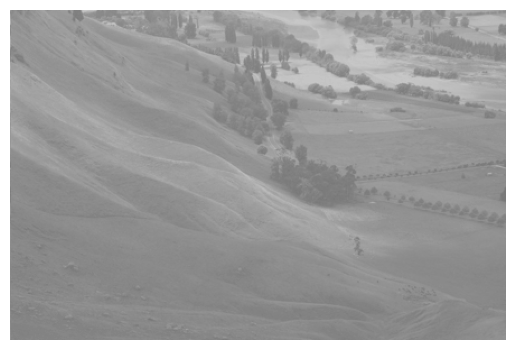

In [6]:
plt.imshow(img,cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [7]:
hist,bins = np.histogram(img.flatten(),256,[0,256])  
cdf = hist.cumsum()

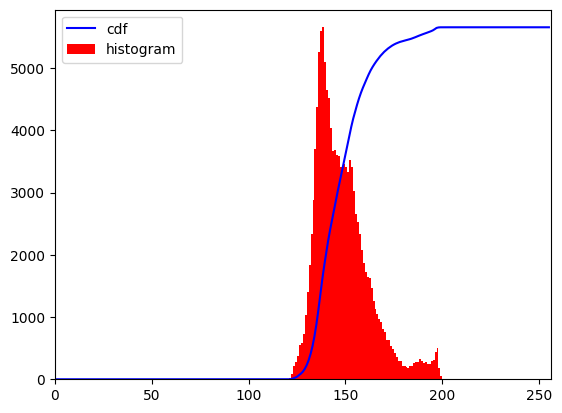

In [8]:
cdf_normalized = cdf * float(hist.max()) / cdf.max() 
plt.plot(cdf_normalized, color = 'b') 
plt.hist(img.flatten(),256,[0,256], color = 'r') 
plt.xlim([0,256])  
plt.legend(('cdf','histogram'), loc = 'upper left')  
plt.show()

In [9]:
img.shape

(295, 443)

In [10]:
equ = cv.equalizeHist(img)

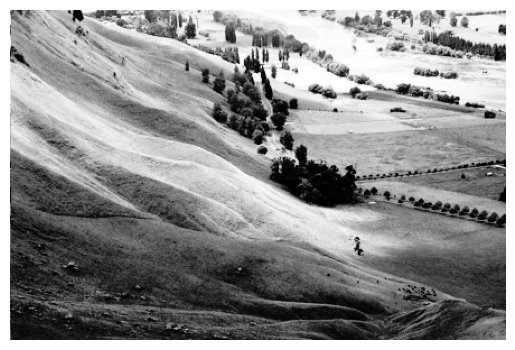

In [11]:
plt.imshow(equ,cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.show()

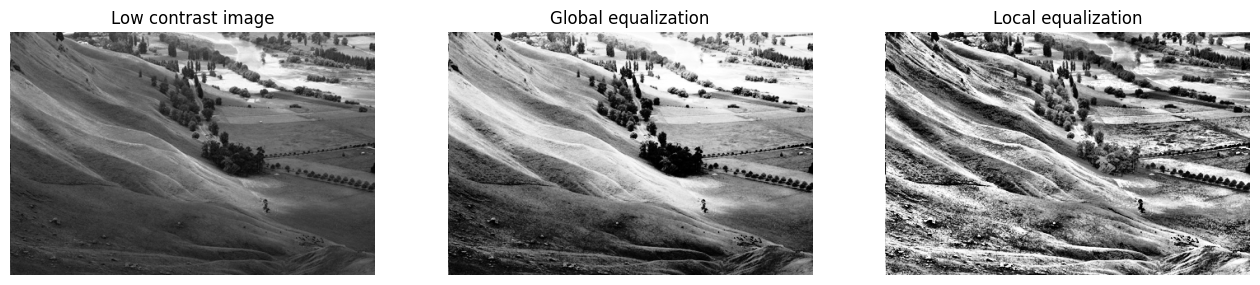

In [12]:
img = img_as_ubyte(imread(path, as_gray=True))
img_global = exposure.equalize_hist(img)
kernel = morp.disk(30)
img_local = rank.equalize(img, kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)
ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()
plt.show()

In [13]:
hist,bins = np.histogram(img.flatten(),256,[0,256]) 

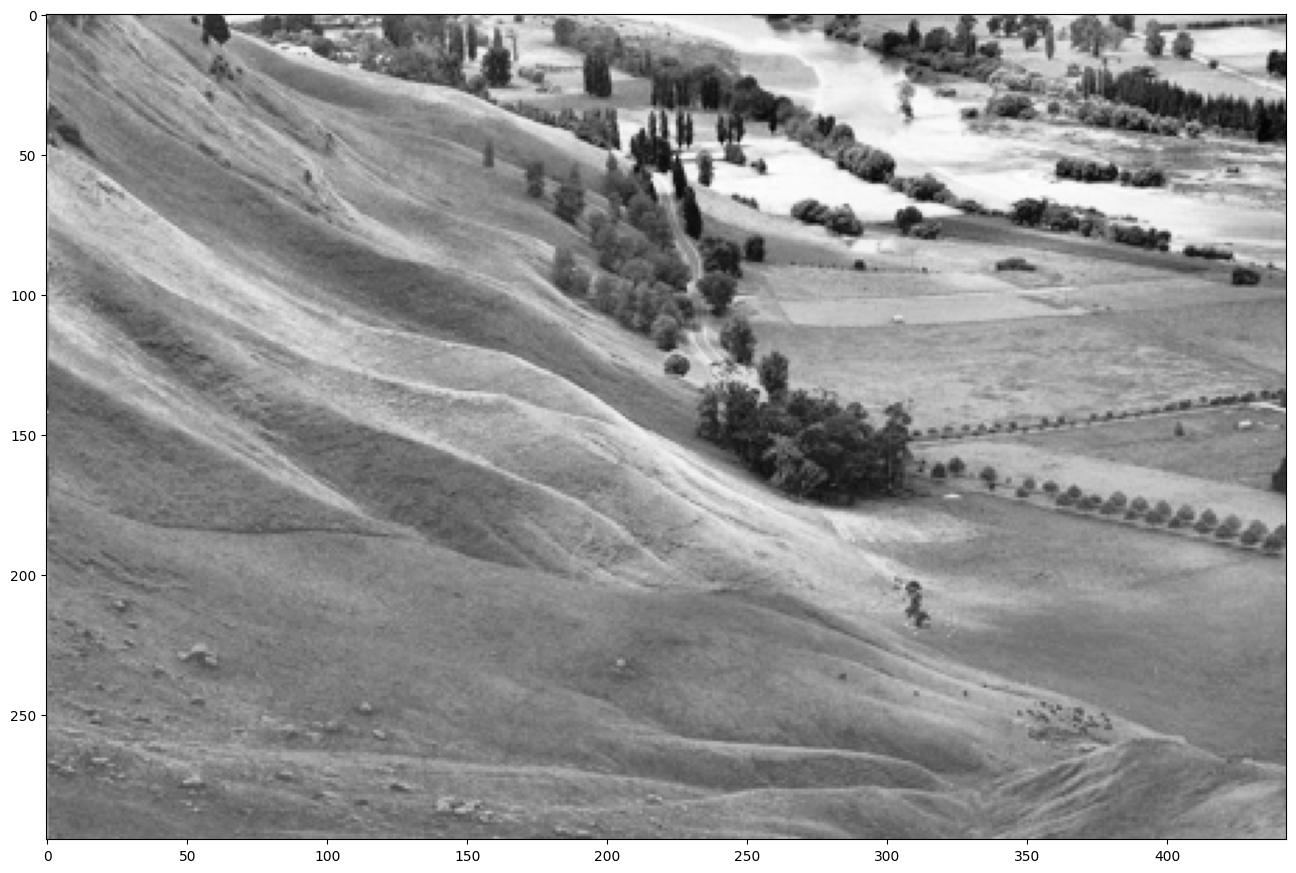

In [17]:
path = "vallee.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)
plt.imshow(cl1, cmap="Greys_r")
plt.show()